In [38]:
#Moving Average Forecast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv('avocado.csv')
df = df[(df.region=='TotalUS')&(df.type=='conventional')]
df2 = df.iloc[:, 1:3]
df2.Timestamp = pd.to_datetime(df2.Date,format='%Y-%m-%d') 
df2.index = df2.Timestamp 
df2 = df2.resample('D').mean()
df3 = df2.reset_index().dropna()

C:\Users\xieqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


,Date,AveragePrice
0,2015-01-04,0.95
7,2015-01-11,1.01
14,2015-01-18,1.03
21,2015-01-25,1.04
28,2015-02-01,0.89
35,2015-02-08,0.95
42,2015-02-15,1.03
49,2015-02-22,1.02
56,2015-03-01,0.97
63,2015-03-08,1.02


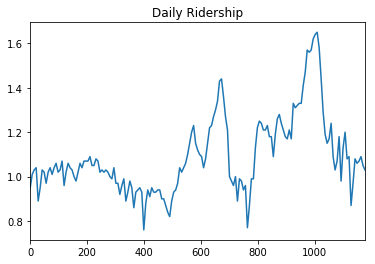

In [39]:
df3.AveragePrice.plot(title= 'Daily Ridership', )
plt.show()

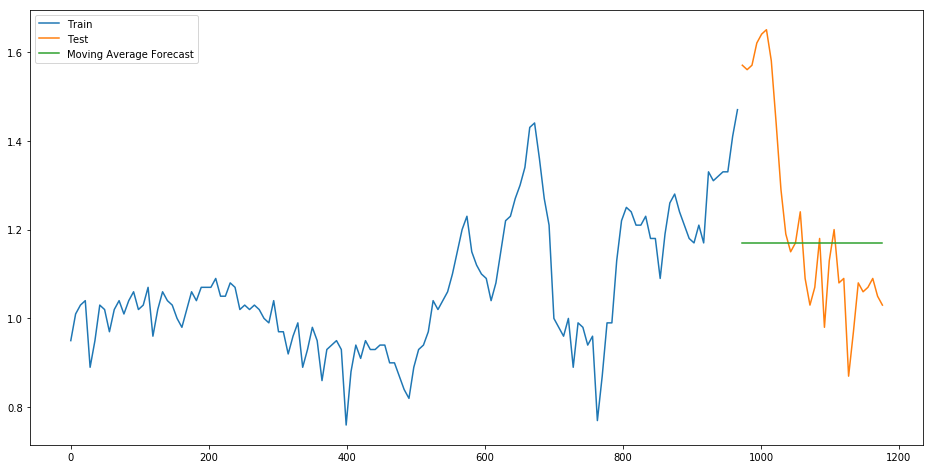

In [40]:
train=df3[0:-30] 
test=df3[-30:]
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['AveragePrice'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['AveragePrice'], label='Train')
plt.plot(test['AveragePrice'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test.AveragePrice, y_hat_avg.moving_avg_forecast))

In [42]:
rmse

0.23661178941229669

In [43]:
e=test.AveragePrice - y_hat_avg.moving_avg_forecast
mase = np.round(np.mean(np.abs(e*100/test.AveragePrice)),0)

In [44]:
mase

14.0